In [61]:
# 인공지능 Homework 8
# 이름: 정성훈
# 학번: 60191686

# 1. 강의시간에 활용했던 한글 영화평 데이터(ratings_train.txt, ratings_test.txt)를 사용하여 다음에 해당하는 코드를 작성하시오. 아래 모든 문항에 대한 설명과 충분한 증빙자료(코드, 스크린 샷, 주석 등)가 보고서에 포함되어야 합니다.

# 라이브러리 사용
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt

In [62]:
# 1 - a)

# 영화평 데이터 파일 loading & train data와 test data로 분리
train_data = pd.read_csv("./sample_data/ratings_train.txt", delimiter="\t", keep_default_na=False)
valid_data = pd.read_csv("./sample_data/ratings_test.txt", delimiter="\t", keep_default_na=False)

# 데이터와 Label로 분리
train_x, train_y = train_data['document'], train_data['label']
valid_x, valid_y = valid_data['document'], valid_data['label']

In [63]:
# 1 - b)

# Okt 사용
twitter = Okt()

# 토크나이저 함수 정의
def tokenizer_korean(text):
    morphed_list = twitter.pos(text, norm=True, stem=True)
    result = []
    for word in morphed_list:
        if not word[1] in ["Josa", "Eomi", "Punctuation", "KoreanParticle"]:
            result.append(word[0])
    return result

# 테스트 데이터 토크나이저 적용 전과 후 비교
print(train_x[1])
print(tokenizer_korean(train_x[1]))

# 조사, 어미, 문장부호 등이 제거되었음을 볼 수 있다.
# 이러한 토크나이저 함수를 통해 데이터의 차원을 줄일 수 있게 되므로 모델의 생성을 위한 시간이 줄어든다.

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다']


In [24]:
# 1 - c)

# TfidfVectorizer 사용 & BOW 생성
vect = TfidfVectorizer(tokenizer=tokenizer_korean).fit(train_x)
fitted_train_x = vect.transform(train_x)
fitted_valid_x = vect.transform(valid_x)

  (0, 37720)	0.45785907908518
  (0, 37494)	0.3043279726856257
  (0, 26275)	0.37510430072242007
  (0, 16655)	0.5396067903097983
  (0, 11843)	0.5156266325272867
  (1, 46005)	0.3948219173669031
  (1, 42674)	0.3522650790151567
  (1, 38884)	0.36713758055435725
  (1, 36778)	0.309200714156536
  (1, 29661)	0.4233878861081901
  (1, 29354)	0.12111034807737996
  (1, 29020)	0.22562831303223427
  (1, 27015)	0.21424311144041985
  (1, 19632)	0.2409765070504278
  (1, 4169)	0.375269158174095
  (2, 39282)	0.24341478139264053
  (2, 19663)	0.10585486079731403
  (2, 17905)	0.5070257916043699
  (2, 17098)	0.4782784452334599
  (2, 14027)	0.4158988596181004
  (2, 10898)	0.4039676328694152
  (2, 10887)	0.18341423585008926
  (2, 9961)	0.2718751117111555
  (3, 42567)	0.2097839729229707
  (3, 36124)	0.45520554215987247
  :	:
  (149996, 9972)	0.46100278354568586
  (149996, 9781)	0.7135461321635765
  (149997, 45076)	0.43512654553277397
  (149997, 43728)	0.3240333009824598
  (149997, 43364)	0.43512654553277397
  (14

In [64]:
# 1 - c)

# BOW 출력 - sparse matrix
print(fitted_train_x[0,:])

# BOW 출력 - array
print(fitted_train_x[0, 11843:37721].toarray())

  (0, 37720)	0.45785907908518
  (0, 37494)	0.3043279726856257
  (0, 26275)	0.37510430072242007
  (0, 16655)	0.5396067903097983
  (0, 11843)	0.5156266325272867
[[0.51562663 0.         0.         ... 0.         0.         0.45785908]]


In [65]:
# 1 - d)

# MultinomialNB 사용 & Model training
nb = MultinomialNB()
nb.fit(fitted_train_x, train_y)

# Prediction
prediction = nb.predict(fitted_valid_x)

# 결과에 대한 정확도 출력
ac_score = metrics.accuracy_score(prediction, valid_y)
print("Accuracy =", round(ac_score, 2))

# Accuracy = 0.84

Accuracy = 0.84


In [50]:
# 1 - e)

# Multinomial distribution smoothing(alpha 값 변경)

# 최적의 정확도를 계산하기 위한 변수
a_max = 0
alpha = 0.1

# 1-f에서 plot를 그리기 위한 변수 선언
a_values = []
a_indexs = []

# MultinomialNB 사용 & Model training
for i in np.arange(0.1, 30, 0.1):
    nb = MultinomialNB(alpha=i)
    nb.fit(fitted_train_x, train_y)
    
    # Prediction
    prediction = nb.predict(fitted_valid_x)

    # 결과에 대한 정확도 계산
    ac_score = metrics.accuracy_score(prediction, valid_y)

    # alpha & accuracy 값 저장
    a_values.append(ac_score)
    a_indexs.append(round(i, 1))

    # 가장 최적의 정확도 구하기
    if(a_max < ac_score):
        a_max = ac_score
        alpha = i

# alpha=2.4일 때 정확도가 0.83926로 가장 최적의 정답률이었다.
print("최적의 정확도 = {} & alpha value = {} ".format(a_max, round(alpha, 1)))

최적의 정확도 = 0.83926 & alpha value = 2.4 


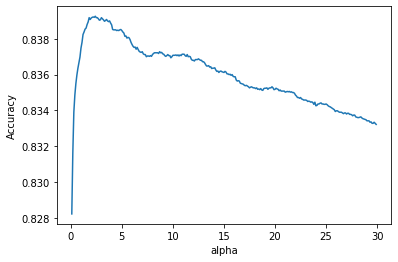

In [66]:
# 1 - f)

# Data Visualization
plt.plot(a_indexs, a_values)
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()